# Part 1

#### Input variables:
##### Bank client data:

- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric) 
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
-  9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)
    other attributes:
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Python Coding and Data Set

In [1]:
# I made a .py file so I can just type and copy this to get all of my usual imports. 

import imports

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

In [3]:
df = pd.read_csv('Bank-Full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Check for missing values, and there are none

print "missing values \n", df.isnull().sum()

missing values 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# Get data types for variables, and it looks like I will want to factorize some using a label encoder.

print "dataframe types \n", df.dtypes

dataframe types 
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [7]:
# Just describe my variables for reference. For the label encoder I am going to want unique values

print "dataframe describe \n", df.describe()
for item in df:
    print item
    print df[item].nunique()

dataframe describe 
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%    

In [8]:
# I designed a function to encode labels from a dictionary
# I did this because I wanted a dictionary for my label encoder to more easily identify classes and their corresponding values


def label_encoder(col, code_dict):
    
    # copy series
    col_coded = pd.Series(col, copy=True)
    
    # enumerate the dictionary for the size of the dictionary
    for key, value in code_dict.items():
        
        # Swap the classification with the number and add it to the list or replace it to the list 
        col_coded.replace(key, value, inplace=True)
    
    # Return the pandas series
    return col_coded

In [9]:
y_dict = {'no':0,'yes':1}

In [10]:
#Use my label encoder to change to make a numerical column based on the dictionary above

df['binary_td'] = label_encoder(df.y, y_dict)
print '\n After Label Coder:'
print pd.value_counts(df.binary_td)


 After Label Coder:
0    39922
1     5289
Name: binary_td, dtype: int64


In [11]:
# Get mean and median of age for individuals who have made a term deposit

yes_mean = df[df.y == 'yes']['age'].mean()
yes_median = df[df.y == 'yes']['age'].median()

# Get mean and median for individuals who have not made a term deposit

no_mean = df[df.y == 'no']['age'].mean()
no_median = df[df.y == 'no']['age'].median()

In [12]:
# Age does not seem to have a strong relationship with whether or not an individual makes a term deposit. 
# The average and median age did not change much between those who did and did not make term deposits. 
# It is unlikely age will have much of an effect in our model later on. 

print yes_mean
print yes_median
print no_mean
print no_median

41.6700699565
38.0
40.8389860227
39.0


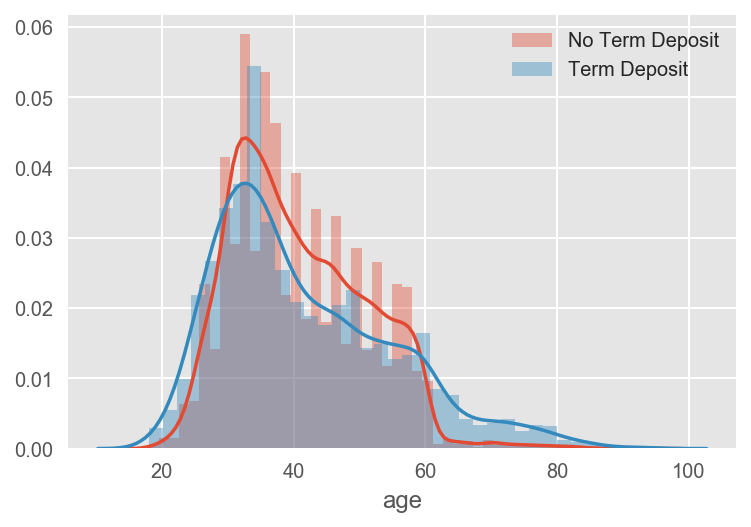

In [13]:
# Separate age by those who did subscribe for a term deposite and those who did not

age_yes = df[df.y == 'yes']['age']

age_no = df[df.y == 'no']['age']

sns.distplot(age_no, label='No Term Deposit')
sns.distplot(age_yes, label='Term Deposit')
plt.legend()

### Age does not seem to be a factor in whether or not they subscribe for a term deposit. They have a very similar distribution,  at each age a both distributions have a similar proportion of people subscribed for term deposits. It should not be a huge determient factor in a model. 

In [14]:
df.y.describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

(array([ 39922.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   5289.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

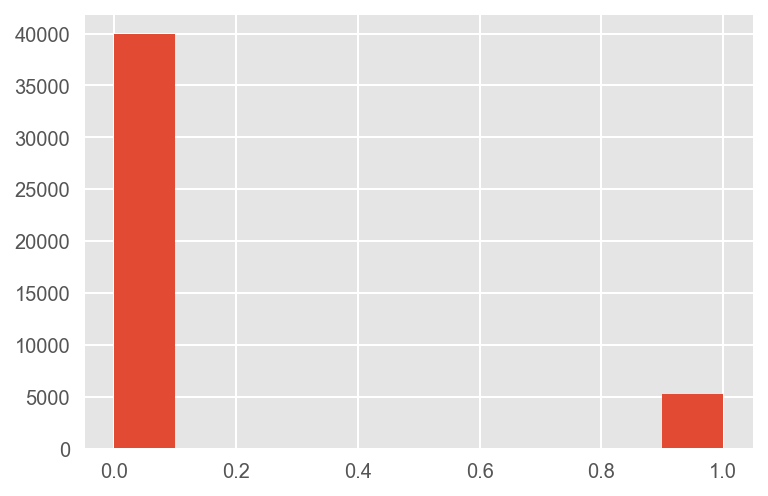

In [15]:
plt.hist(df.binary_td)

### There are a lot more people who do not get term deposites opposed to people who do. Our data is unbalanced. However, I dod not want to drop a lot of data points to balance out our data. So given the age data roughly this same proportion of people did not subscribe for a term deposit at each age group. 

In [16]:
def bootstrap(sample, stat_func, niter = 100):
    '''Create 100 samples with replacement'''
    #stat_func: statistical function desired from each sample (Usually mean)
    
    # initialize list
    bootstrap_list = []
    
    #Create for loop for 100 sample size to reproduce 100 times
    for i in range(niter):
        
        # Ransom select a number from a sample, take as many samples as the size, and make sure replace = True
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        
        #Take a stat of the sample (almost always the mean)
        bootstrap_stat = stat_func(bootstrap_sample)
        
        #append to list
        bootstrap_list.append(bootstrap_stat)
        
    #Return list
    return bootstrap_list

In [17]:
# Normal mean from data set

df.binary_td.mean()

0.11698480458295547

In [18]:
# Mean of bootstrapped sample, very close to actual dataset. 

sum(bootstrap(df.binary_td, np.mean))/len(bootstrap(df.binary_td, np.mean))

0.11686934595563031

## Exploratory Analysis

#### I want to factorize a lot of the variables because they are classifications based. By converting them to a numerical format I can use them in model. I built my own label encoder so I can more easily keep track of what numerical value was assigned to which category.

In [19]:
# Create a dictionary of the unique marital values and numbers to assign them to. 
marital_dict = dict(zip(df.marital.unique(), [0, 1, 2]))

In [20]:
marital_dict

{'divorced': 2, 'married': 0, 'single': 1}

In [21]:
# Create new column in dataframe, and 
df['factorize_marital'] = label_encoder(df.marital, marital_dict)
print '\n After Label Coder:'
print pd.value_counts(df.factorize_marital)


 After Label Coder:
0    27214
1    12790
2     5207
Name: factorize_marital, dtype: int64


In [22]:
education_dict = dict(zip(df.education.unique(), [0, 1, 2, 4]))

In [23]:
education_dict

{'primary': 4, 'secondary': 1, 'tertiary': 0, 'unknown': 2}

In [24]:
df['factorize_edu'] = label_encoder(df.education, education_dict)
print '\n After Label Coder:'
print pd.value_counts(df.factorize_edu)


 After Label Coder:
1    23202
0    13301
4     6851
2     1857
Name: factorize_edu, dtype: int64


In [25]:
default_dict = dict(zip(df.default.unique(), [0, 1]))

In [26]:
default_dict

{'no': 0, 'yes': 1}

In [27]:
df['binary_default'] = label_encoder(df.default, default_dict)
print '\n After Label Coder:'
print pd.value_counts(df.binary_default)


 After Label Coder:
0    44396
1      815
Name: binary_default, dtype: int64


In [28]:
housing_dict = dict(zip(df.housing.unique(), [1, 0]))

In [29]:
housing_dict

{'no': 0, 'yes': 1}

In [30]:
df['binary_housing'] = label_encoder(df.housing, housing_dict)
print '\n After Label Coder:'
print pd.value_counts(df.binary_housing)


 After Label Coder:
1    25130
0    20081
Name: binary_housing, dtype: int64


In [31]:
contact_dict = dict(zip(df.contact.unique(), [0, 1, 2]))

In [32]:
contact_dict

{'cellular': 1, 'telephone': 2, 'unknown': 0}

In [33]:
df['factorize_contact'] = label_encoder(df.contact, contact_dict)
print '\n After Label Coder:'
print pd.value_counts(df.factorize_contact)


 After Label Coder:
1    29285
0    13020
2     2906
Name: factorize_contact, dtype: int64


In [34]:
loan_dict = dict(zip(df.loan.unique(), [0, 1]))

In [35]:
loan_dict

{'no': 0, 'yes': 1}

In [36]:
df['binary_loan'] = label_encoder(df.loan, loan_dict)
print '\n After Label Coder:'
print pd.value_counts(df.binary_loan)


 After Label Coder:
0    37967
1     7244
Name: binary_loan, dtype: int64


In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,binary_td,factorize_marital,factorize_edu,binary_default,binary_housing,factorize_contact,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,0,1,1,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,0,0,1,0,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,0,0,2,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,0,1,2,0,0,0,0


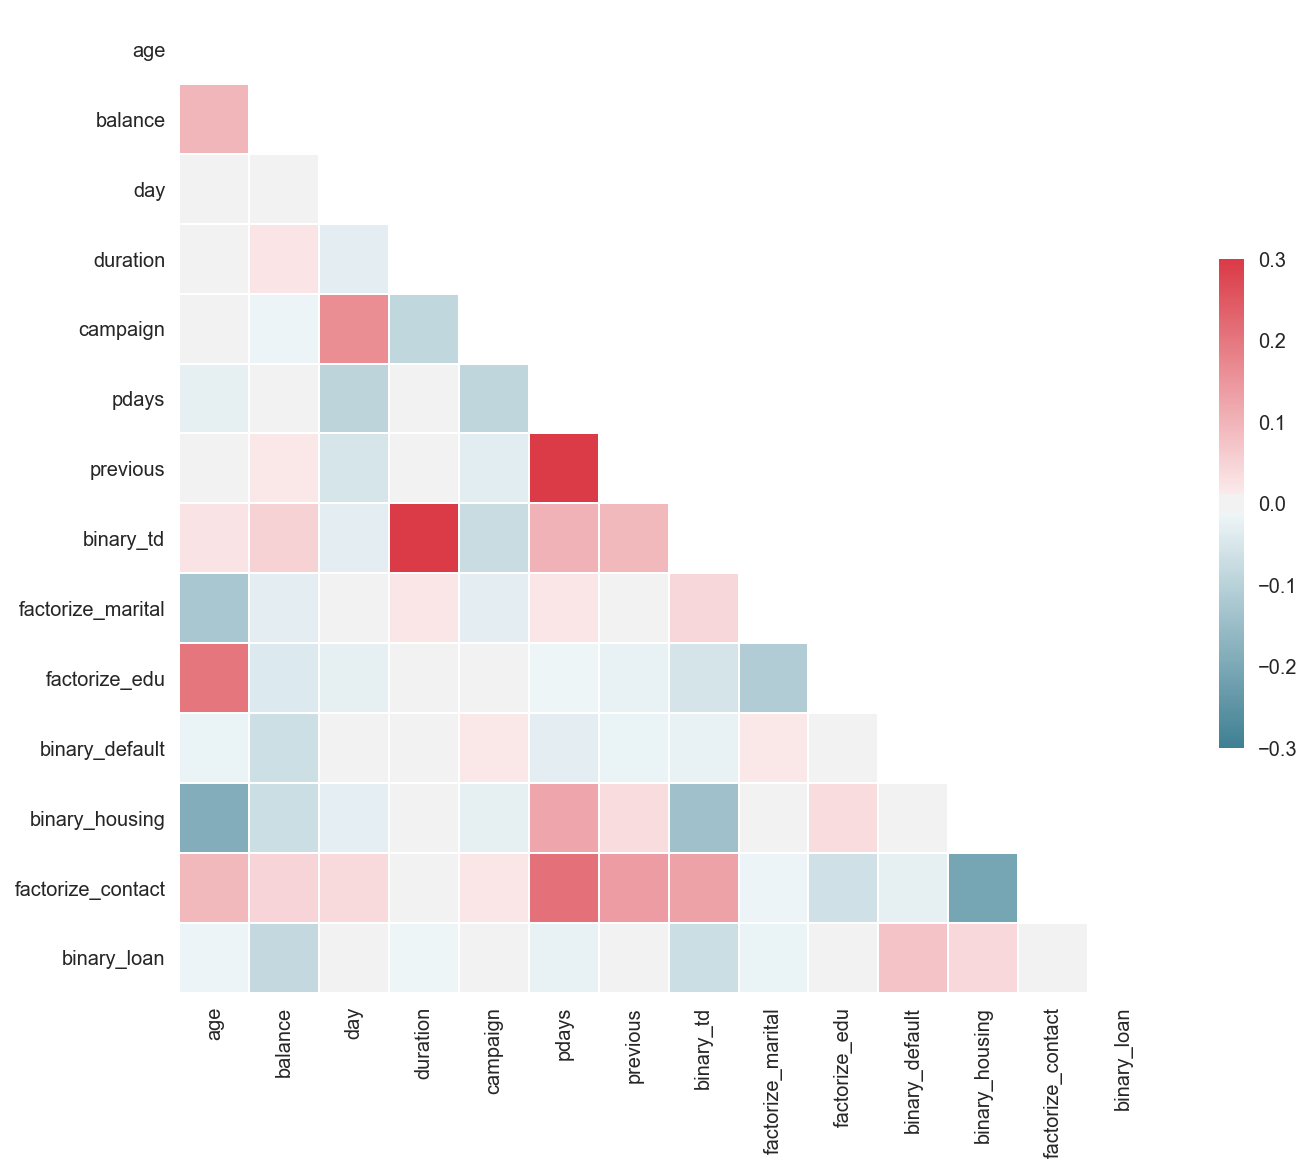

In [38]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Looking at the correlation matrix, duration is positively correlated with term deposit subscriptions. However, just because the other variables are not as correlated it is not clear or not if they have any classification effect on term deposits. Given this matrix I am going to start with duration. 

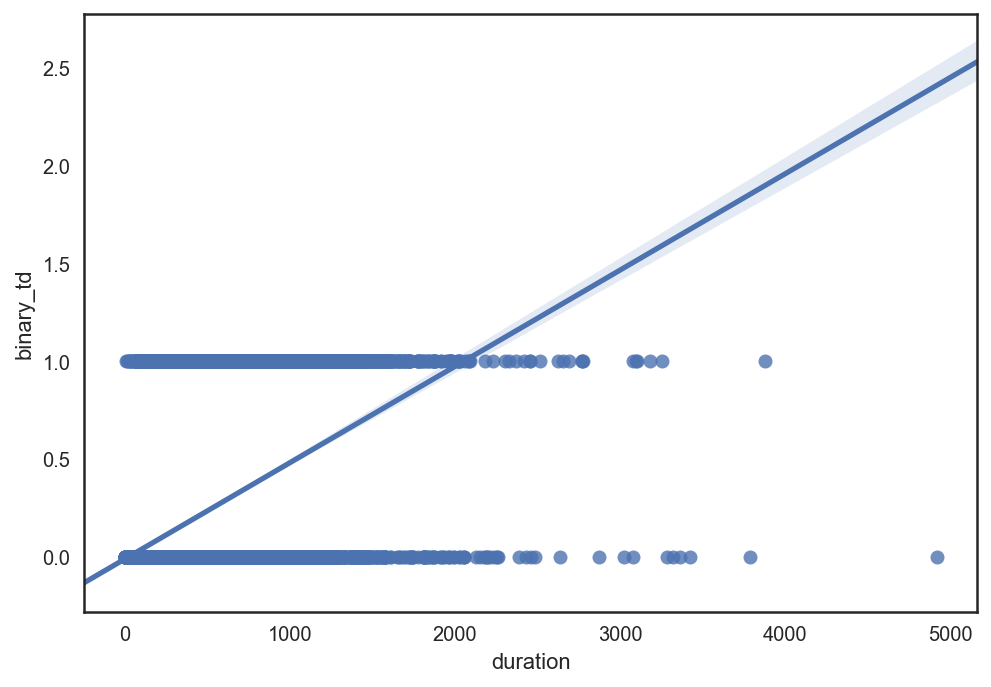

In [39]:
sns.regplot(df.duration, df.binary_td)
# This is an example of something that is not very useful, because of the binary classification. 

### Duration is clearly correlated with whether or not they decide to make a term deposit, but since term deposit is a binary variable it is hard to plot the variables relationship. 

In [40]:
# Separate duration for individuals who did and did not subscribe for a term deposit

no_dur = df[df.y == 'no']['duration']

In [41]:
yes_dur = df[df.y == 'yes']['duration']

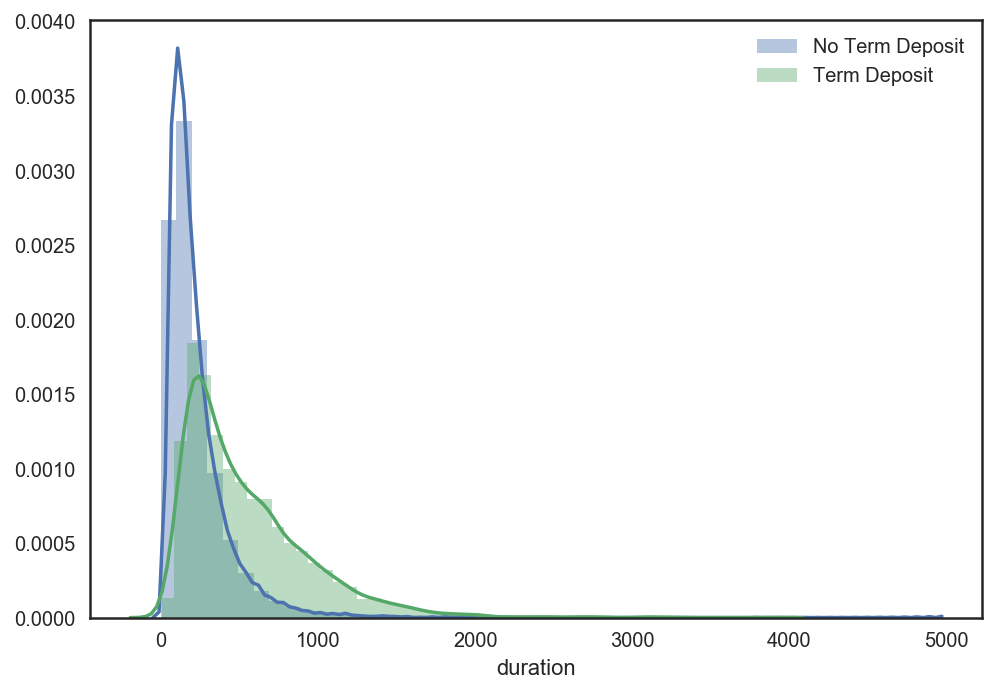

In [42]:
sns.distplot(no_dur, label='No Term Deposit')
sns.distplot(yes_dur, label='Term Deposit')
plt.legend()

### The duration of time which an individual was contacted looks to impact impact on whether or not they apply for a term deposit. A vast majority of individuals who applied for a term deposit were contacted eariler on, and has a steep drop off as time increases. It seems clear that duration has a positive correlation and effect on whether or not an individual subscribes to a term loan. 

In [43]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

0.581007965533
0.365853658537


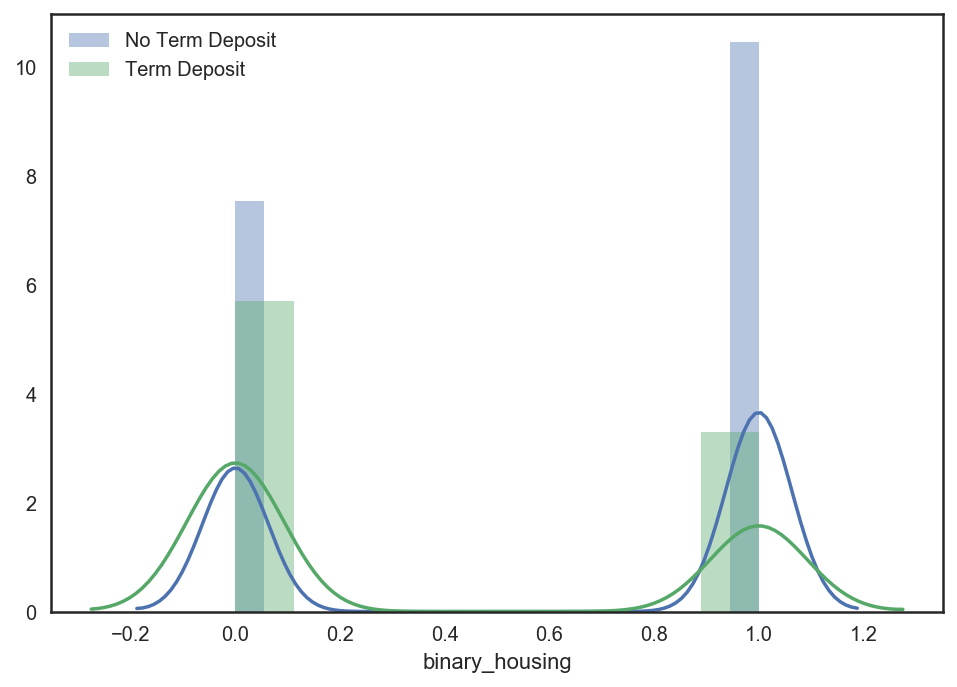

In [44]:
# Just by looking at these means it appears that majority of individuals who did subscribe to a term deposit
# did not have housing loans. I can tell this because the mean is closer to 0, 0 is the no value, for individuals
# who did apply for a term subscription. 

print df[df.y == 'no']['binary_housing'].mean()
print df[df.y == 'yes']['binary_housing'].mean()

no_house = df[df.y == 'no']['binary_housing']
yes_house = df[df.y == 'yes']['binary_housing']

sns.distplot(no_house, label='No Term Deposit')
sns.distplot(yes_house, label='Term Deposit')
plt.legend()

### If they do not have a housing loan it does not appear to impact if they subscribe to for a term deposit, as the their distribution curves are very similar. Of those who do have a housing loan about 65% of them are subscribing to term deposits. This should have an impact on our model and have some feature importance. This makes sense becasue when they were pretty equal when they did not have a house, but when they did have a house there more people did not subscribe for a term loan. Only when they have a house will this be a good predictor for those who did not subscribe for a term deposit. 

1303.71496919
1804.26791454


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


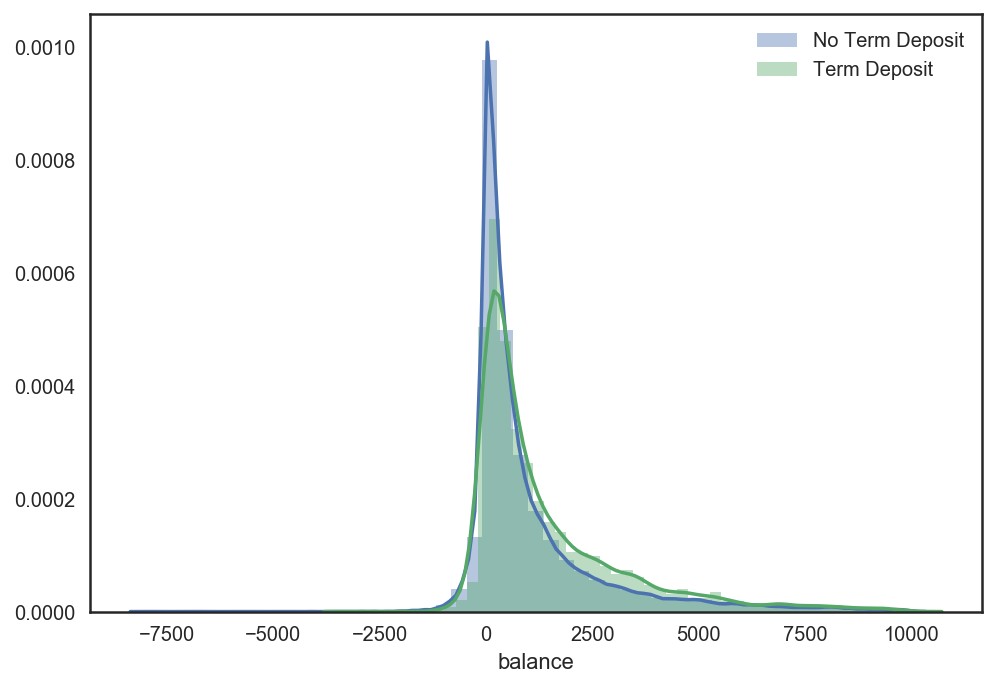

In [45]:
print df[df.y == 'no']['balance'].mean()
print df[df.y == 'yes']['balance'].mean()

no_bal = df[df.y == 'no'][df.balance <= 10000]['balance']
yes_bal = df[df.y == 'yes'][df.balance <= 10000]['balance']

sns.distplot(no_bal, label='No Term Deposit')
sns.distplot(yes_bal, label='Term Deposit')
plt.legend()

### Balance data was infrequent and similar over 10,000 and just made the data harder to visualize. It appears even below 10,000 the balance distributions are similar. However, when the balances are lower there is a larger percentage of individuals who do subscribe for a term deposit. This distribution reminds me of the duration distribution and is leading me to believe that it will be a decent predictor for determing whether or no an individual will subscribe for a term deposit. 

In [40]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [41]:
# Categories martital status by frequency of individuals with term deposit subscriptions

no_marital_freq = [df[df.y == 'no' ][df.marital == 'single'].marital.count(),
                     df[df.y == 'no' ][df.marital == 'married'].marital.count(),
                     df[df.y == 'no' ][df.marital == 'divorced'].marital.count()]

yes_marital_freq = [df[df.y == 'yes' ][df.marital == 'single'].marital.count(),
                     df[df.y == 'yes' ][df.marital == 'married'].marital.count(),
                     df[df.y == 'yes' ][df.marital == 'divorced'].marital.count()]
print no_marital_freq
print yes_marital_freq

[10878, 24459, 4585]
[1912, 2755, 622]


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__ma

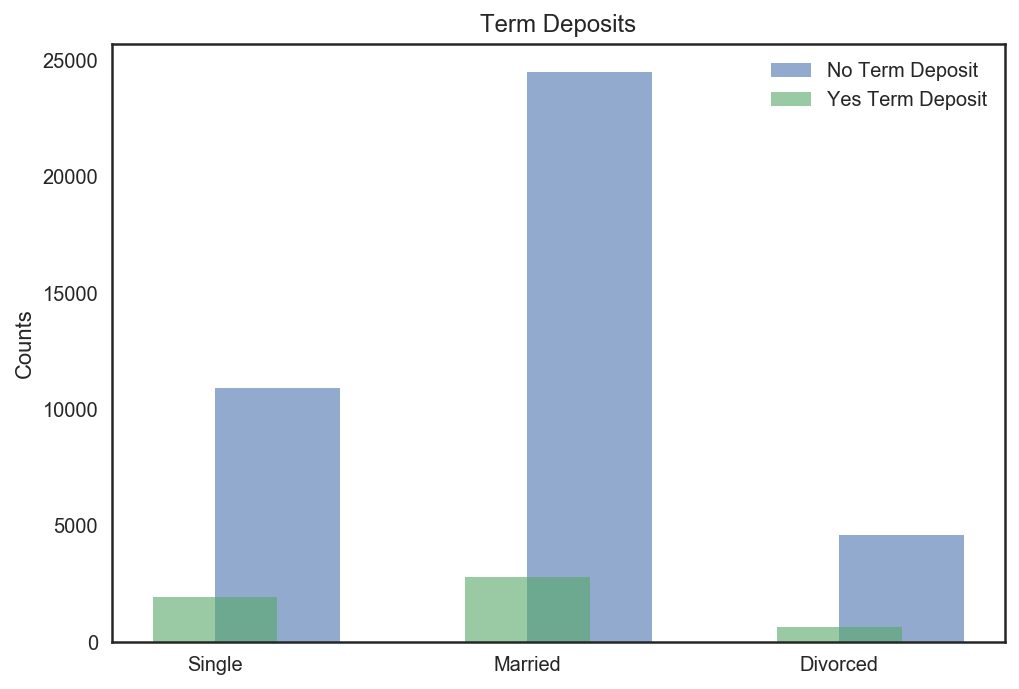

In [42]:
# Plot on graph

objects = ('Single', 'Married', 'Divorced')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, no_marital_freq, alpha=0.6, label='No Term Deposit', align='edge', width=0.4)
plt.bar(y_pos, yes_marital_freq, alpha=0.6, label='Yes Term Deposit', align='center', width=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Term Deposits')
plt.legend()

### This shows the disparity between individuals who applied for a term deposit and those who didnt for each marital status. However, I already knew a lot more people did not, so this makes sense. A percentage of individuals who applied for a term deposit given their marital status might provide me with more information. 

In [43]:
no_single  = df[df.y == 'no' ][df.marital == 'single'].marital.count()
no_married = df[df.y == 'no' ][df.marital == 'married'].marital.count()
no_divorce = df[df.y == 'no' ][df.marital == 'divorced'].marital.count()

yes_single  = df[df.y == 'yes' ][df.marital == 'single'].marital.count()
yes_married = df[df.y == 'yes' ][df.marital == 'married'].marital.count()
yes_divorce = df[df.y == 'yes' ][df.marital == 'divorced'].marital.count()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [44]:
single = yes_single + no_single
per_y_s = yes_single/float(single)
per_n_s = no_single/float(single)

married = yes_married + no_married
per_y_m = yes_married/float(married)
per_n_m = no_married/float(married)

divorce = yes_divorce + no_divorce
per_y_d = yes_divorce/float(divorce)
per_n_d = no_divorce/float(divorce)

In [45]:
percents_yes = [per_y_s, per_y_m, per_y_d]
percents_yes

[0.1494917904612979, 0.10123465863158668, 0.11945458037257538]

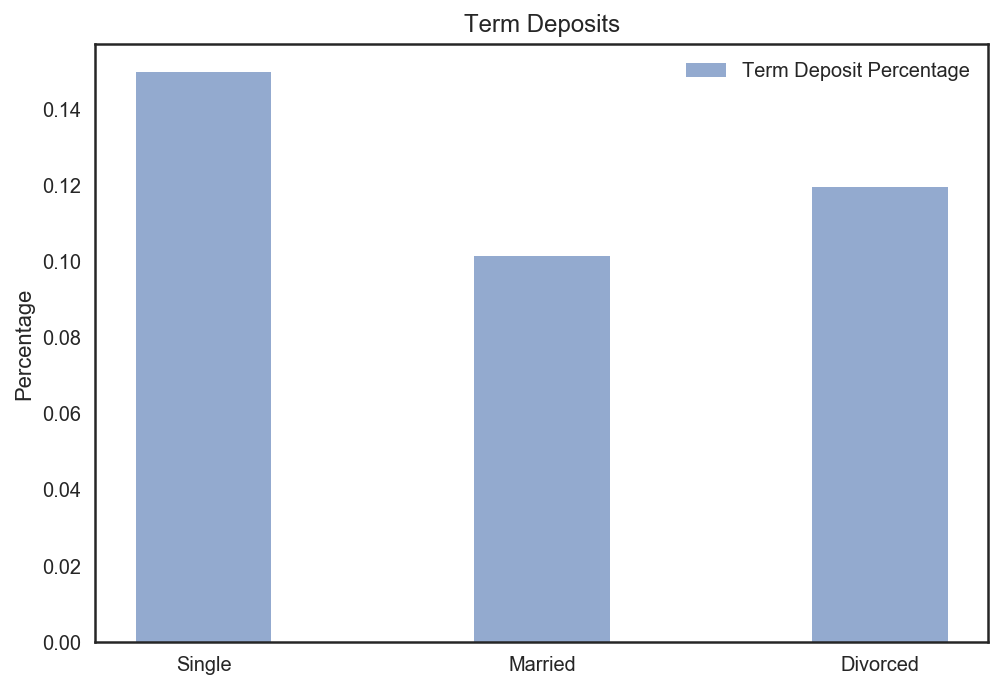

In [46]:
objects = ('Single', 'Married', 'Divorced')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, percents_yes, alpha=0.6, label='Term Deposit Percentage', align='center', width=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Term Deposits')
plt.legend()

### Given your marital status single individuals more often subscribe for term deposits. Since these percentages are not a uniform distribution we know that marital status should have some affect on our on our model. However, the differences between the perecentages is not huge. So it may not be one of the most important variables. 

### The data analysis suggest that duration has the greatest affect on whether or not they apply for a term deposit. Marital status definitally has an affect, but it is unclear to the degree of how much yet. (This will depend on the model). If an individual does not have a housing loan they have tend to subscribe to more term deposits.

In [47]:
y = df.binary_td

In [48]:
X = df.iloc[:, df.columns.get_indexer(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
                                   'factorize_marital', 'factorize_edu', 'binary_default', 'binary_housing',
                                      'factorize_contact', 'binary_loan'])]

In [49]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,factorize_marital,factorize_edu,binary_default,binary_housing,factorize_contact,binary_loan
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,1,1,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,1,0,1
3,47,1506,5,92,1,-1,0,0,2,0,1,0,0
4,33,1,5,198,1,-1,0,1,2,0,0,0,0


### I am going to divide my data up 70% for training and 30% for testing in order to prevent overfitting my training data and just building a prediction absed on the information I have and not the how the data behaves in the real world. 

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### The first model I am going to use in XGBoost, simply because it is the best "off the shelf" model for predicting data. It should at least give me a decent prediction, and show me some of the feature importance to possibly do more analysis. 

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
# This is a grid search to determine which parameters more accurately predict the model. This is important because
# different data sets have different pit falls and different parameter values are needed to overcome these challenges

param_grid = {
 'max_depth':range(3,10,2),
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}


xgb = XGBClassifier()

grid = GridSearchCV(xgb, param_grid)
grid.fit(X_train, y_train)


best_xgb = grid.best_estimator_
print best_xgb


# cv = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=41)

# s = cross_val_score(best_xgb, X_train, y_train, cv=cv, n_jobs=-1)
# print "{} Score:\t{:0.3} ± {:0.3}".format('XGBoost Classifier CV ', s.mean().round(3), s.std().round(3))

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importance = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

KeyboardInterrupt: 

In [52]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [53]:
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)


Model Report
Accuracy : 0.8993
AUC Score (Test): 0.908423


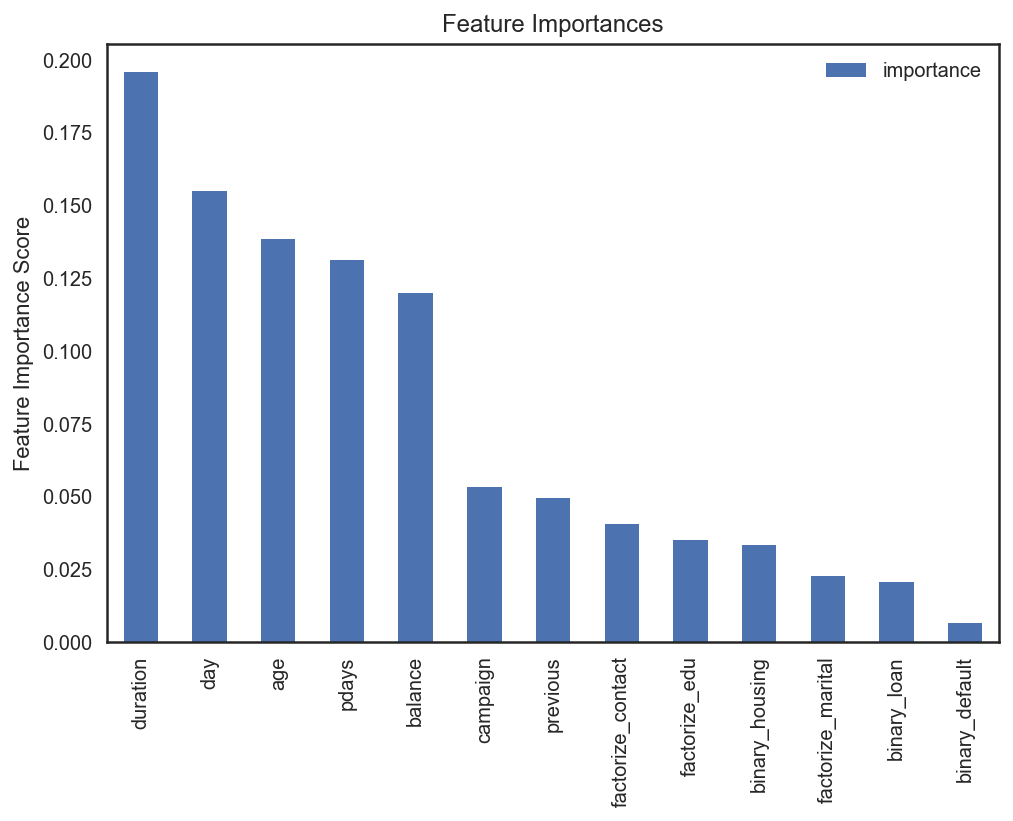

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

#Predict training set:
X_test_predictions = best_xgb.predict(X_test)
X_test_predprob = best_xgb.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % accuracy_score(y_test.values, X_test_predictions)
print "AUC Score (Test): %f" % roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### These feature importances were selected from a varient of decsion trees called XGBoost. A decsion tree wants to seprate on features where they can classify the most amount of points at that branch in the tree, then builds off again from there. This states taht duration clearly plays the biggest role and this is not suprising considering the analysis from above where individuals the with lower durations subscribed to more term subscriptions. Pdays is the number of days since an individual was last contacted which is very closely correlated to the amount of seconds since they were last contacted. So it should also have a similar affect as duration. Marital status has some affect but not a lot which kind of expected based on the previsous analysis. 

### Age seems to have a high feature importance score, but the reasons are unclear to me currently. The distribution between individuals who did not subscribe for a term deposit and those who did seemed were very similar. Their might be something going on there that I have missed. Day of the month they were last contacted also seems to have some importance on their term deposit choice, which seemed odd to me at first. Until I realized the day of the month greatly depends on how much money an individual has depending on pay days and when there bills are due. This could very greatly for each person. 

15.8922899654
15.1582529779


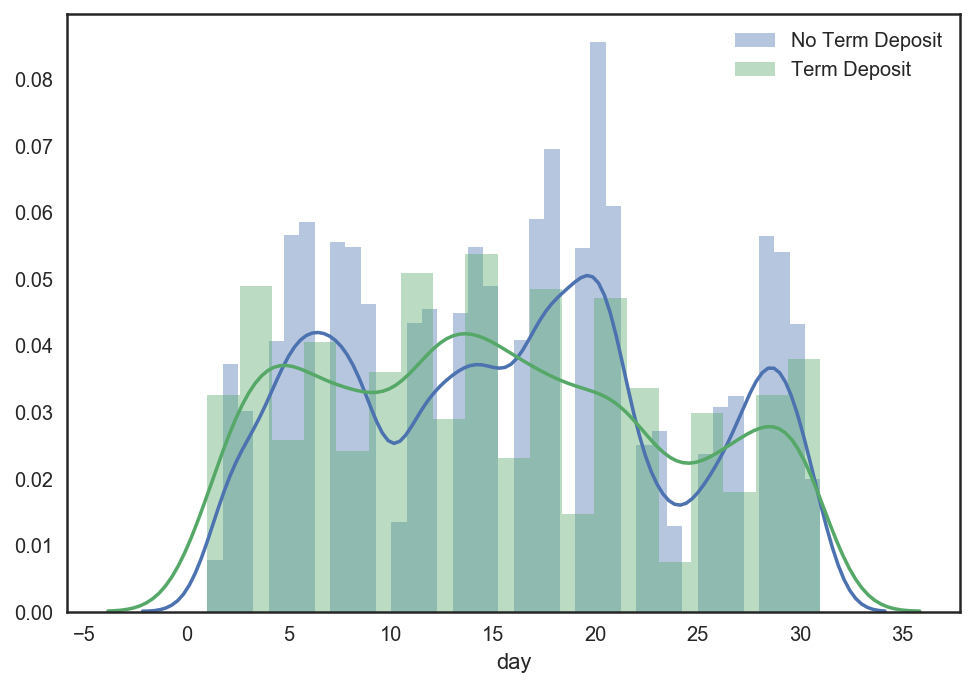

In [55]:
print df[df.y == 'no']['day'].mean()
print df[df.y == 'yes']['day'].mean()

no_day = df[df.y == 'no']['day']
yes_day = df[df.y == 'yes']['day']

sns.distplot(no_day, label='No Term Deposit')
sns.distplot(yes_day, label='Term Deposit')
plt.legend()

### The mean and median do not have much value because they are likely to find their way towards the middle of the month, but the distribution might. There is a big spike right after the 15th, which is not super surprisng because a lot of people get paid on in the middle of the month and have bills due at the begining of the month. So a couple days after the 15th might be a good time for individuals to subscribe to term deposits. 

Accuracy:  0.89931876493
Precision:  0.778293930648
Roc-Auc:  0.90842261989


Confusion matrix, without normalization
                    No Term Deposit    Term Deposit
    No Term Deposit          9681.0           274.0
       Term Deposit           864.0           484.0


Normalized confusion matrix
                    No Term Deposit    Term Deposit
    No Term Deposit             1.0             0.0
       Term Deposit             0.6             0.4


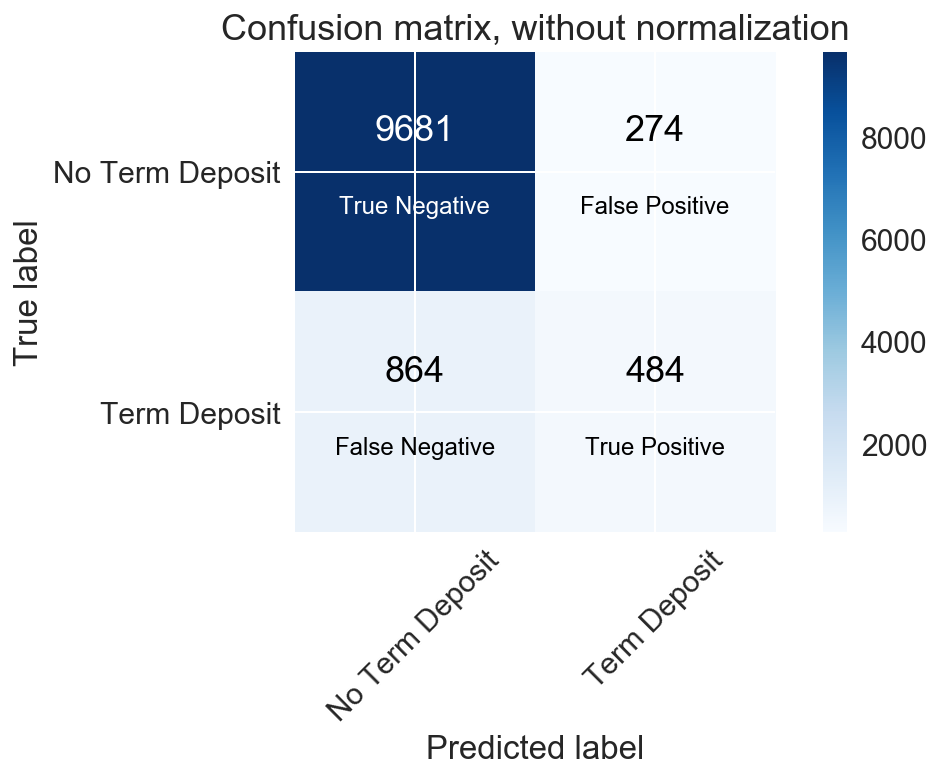

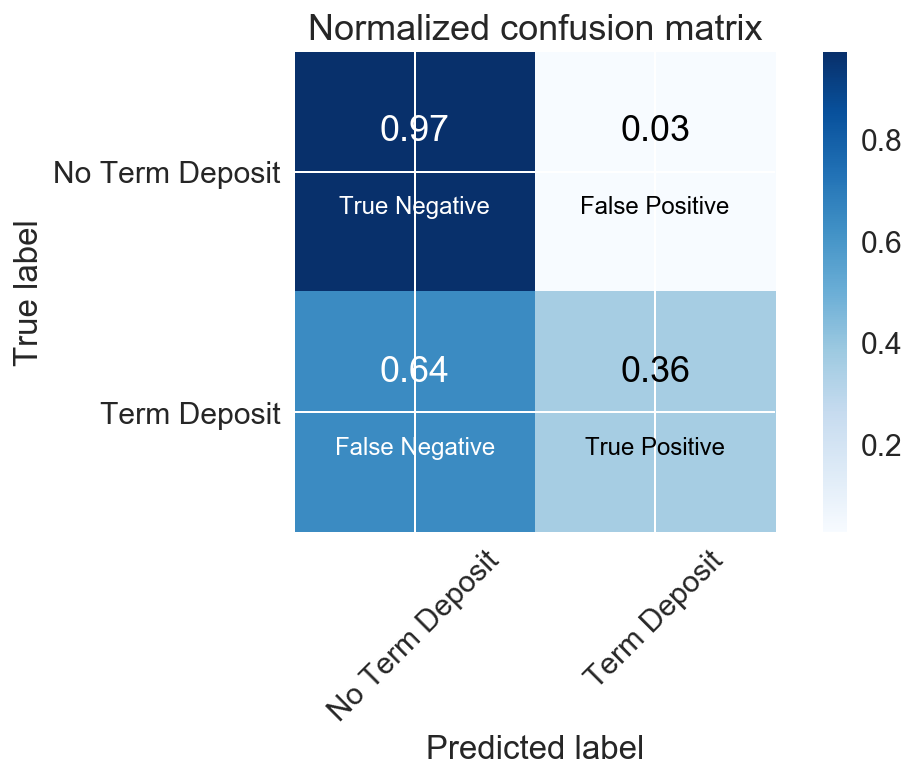

In [56]:
# *** I designed this confusion matrix outline, but I borrowed the base code from sklearn. It prints out pretty confusion
# matrices. It's nice because you only need to change three lines of code, marked below. For the sake of time
# I am not going to comment out every line. 



import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

#CHANGE BELOW*****

y_pred = X_test_predictions
y_test = y_test
class_names = ['No Term Deposit', 'Term Deposit']

#CHANGE ABOVE*****

#Set font and graph size
sns.set(font_scale=1.5)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

def print_cm(cm, labels=class_names, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print "    " + empty_cell,
    for label in labels: 
        print "%{0}s".format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print "    %{0}s".format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print '\n'
        print("Normalized confusion matrix")
    else:
        print '\n'
        print('Confusion matrix, without normalization')
    
    print_cm(cm, class_names)
    
    text_labels = [['True Negative', 'False Positive'], 
                   ['False Negative', 'True Positive']]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j , i - 0.1, format(cm[i, j], fmt),
                 verticalalignment='bottom',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.text(j, i + 0.1, text_labels[i][j], 
                 verticalalignment='top',
                 horizontalalignment="center",
                 fontsize=12,
                 color="white" if cm[i, j] > thresh else "black")
       

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Print accuracy and precision
print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
print 'Precision: ', precision_score(y_test, y_pred, average='macro')
print 'Roc-Auc: ', roc_auc_score(y_test, X_test_predprob)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### XGBoost is one of the best out of the box models, and for a simple classification model it did pretty well. It has high accuracy but not the best roc-auc score. XGBoost predicted that almost everything would not have a term deposit. Which makes sense, because our data is unbalanced with roughly 88% of individuals not subscribing to a term deposit. My goal was to have a lot of true positives, but I did not have as many as I would like. By having a lot of true positives I am accurately predicting the amount indiviudals who do subscribed to term deposits compared to those who dont, which I could get by saying that almost everyone didnt do it. Saying everyone didnt subscribe to a term deposit is not useful. 

### XGBoost is a pretty powerful tool, but I would like to compare XGBoost efficacy to one of the most basic classifiyer models Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

penalties = ['l1', 'l2']
range_C = [10 ** i for i in range(-3, 3)]
class_weights = [None, 'balanced']

param_grid = dict(penalty=penalties, 
              C=range_C, 
              class_weight=class_weights)

logit = LogisticRegression()

grid = GridSearchCV(logit, param_grid)
grid.fit(X_train, y_train)


best_logit = grid.best_estimator_

best_logit = best_logit.fit(X_train, y_train)
score = best_logit.score(X_test, y_test)
print "{} Score:\t{:0.3}".format('Logitistic Classifier', score.mean().round(3))

Logitistic Classifier Score:	0.888


In [58]:
best_logit = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
              intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
              penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
              verbose=0, warm_start=False)

In [59]:
best_logit = best_logit.fit(X_train, y_train)


Model Report
Accuracy : 0.8883
AUC Score (Test): 0.870252


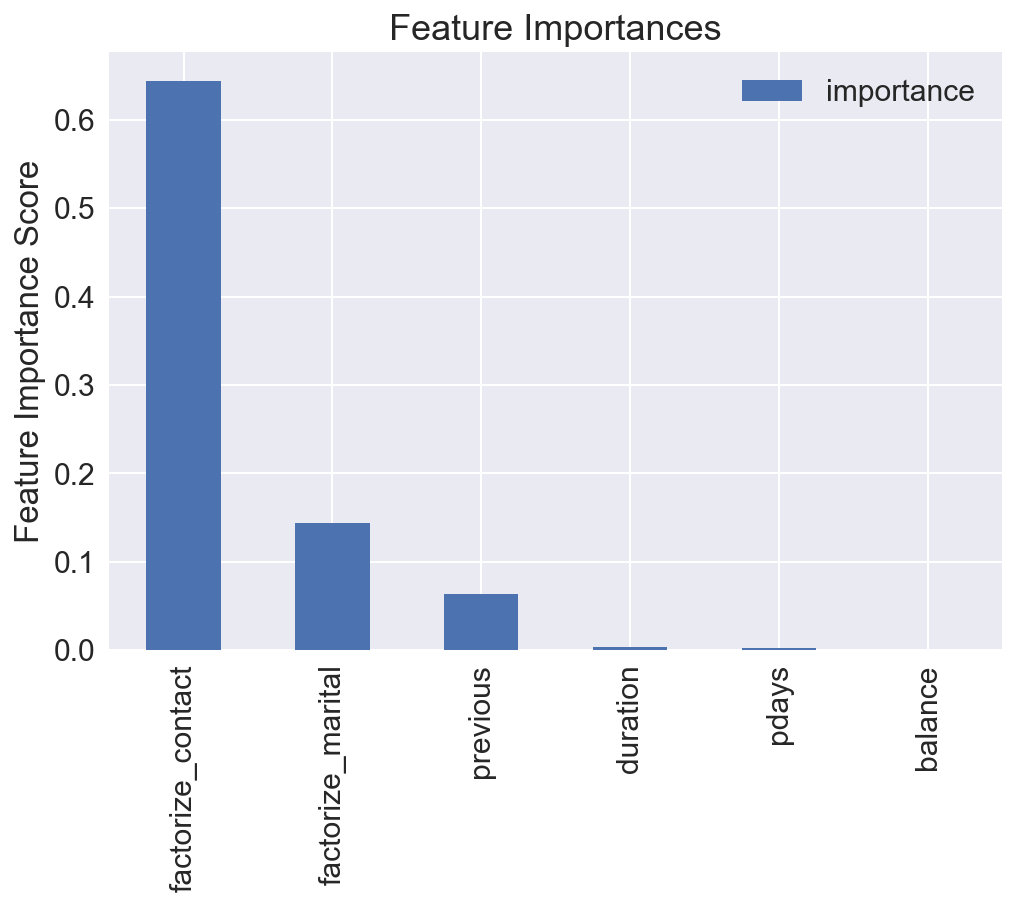

In [60]:
#Predict training set:
X_test_predictions = best_logit.predict(X_test)
X_test_predprob = best_logit.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % accuracy_score(y_test.values, X_test_predictions)
print "AUC Score (Test): %f" % roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_logit.coef_.reshape(13, 1),
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### The logistic roc-auc score, a good evaluator to use when classifying  unbalanced data,  is much worse than the XGBoost score. This is not suprising given the typical efficacy of either model. Duration has a low feature importance which is suprising because xgboost highly valued duration. Also day of the week was thrown out in the ridge regularization, which is suprising because I estimated it would be a better predictor.  

In [61]:
df_logit = df[df.contact != 'unknown']

In [62]:
y_logit = df_logit.binary_td

In [63]:
X_logit = df_logit.iloc[:, df_logit.columns.get_indexer(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
                                   'factorize_marital', 'factorize_edu', 'binary_default', 'binary_housing',
                                      'factorize_contact', 'binary_loan'])]

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X_logit, y_logit)

In [65]:
penalties = ['l1', 'l2']
range_C = [10 ** i for i in range(-3, 3)]
class_weights = [None, 'balanced']

param_grid = dict(penalty=penalties, 
              C=range_C, 
              class_weight=class_weights)

logit = LogisticRegression()

grid = GridSearchCV(logit, param_grid)
grid.fit(X_train, y_train)


best_logit = grid.best_estimator_

best_logit = best_logit.fit(X_train, y_train)
score = best_logit.score(X_test, y_test)
print "{} Score:\t{:0.3}".format('Logitistic Classifier', score.mean().round(3))

Logitistic Classifier Score:	0.862


In [66]:
best_logit = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
best_logit = best_logit.fit(X_train, y_train)


Model Report
Accuracy : 0.862
AUC Score (Test): 0.835820


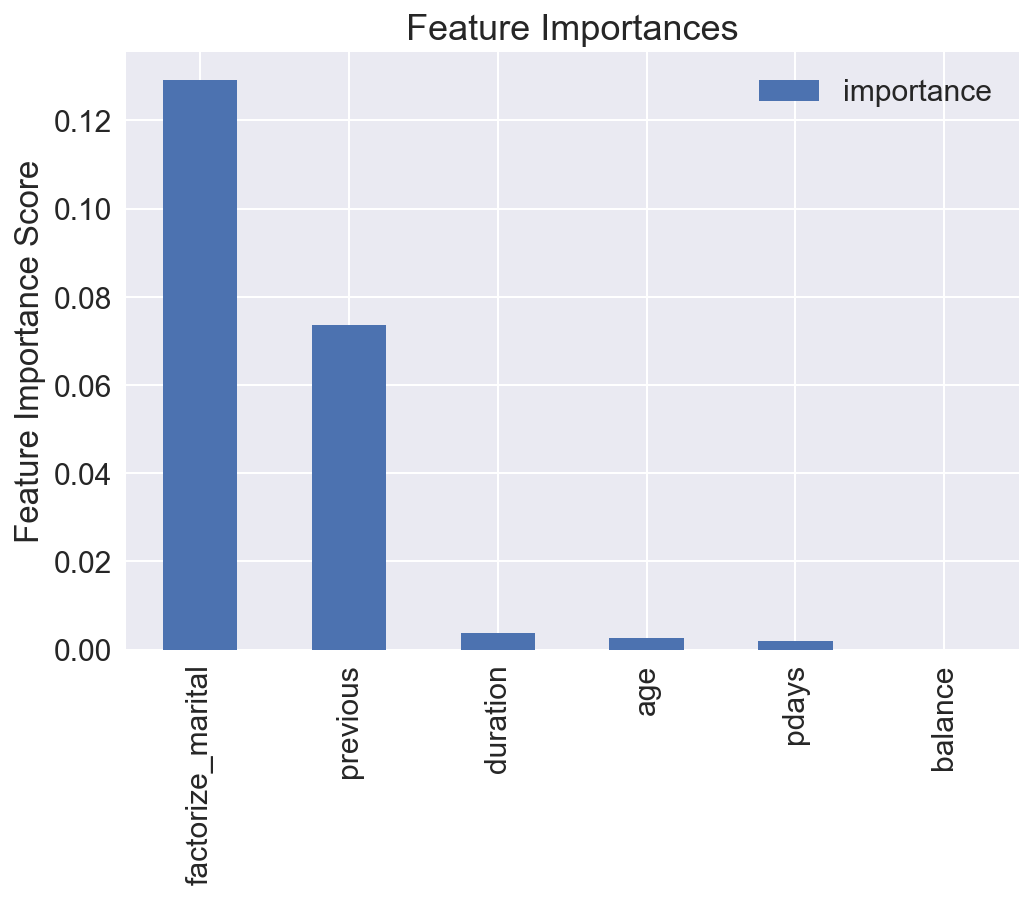

In [68]:
#Predict training set:
X_test_predictions = best_logit.predict(X_test)
X_test_predprob = best_logit.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % accuracy_score(y_test.values, X_test_predictions)
print "AUC Score (Test): %f" % roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_logit.coef_.reshape(13, 1),
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### After removing the unknowns from contact that variable lost it's feature importance in the logit model which makes sense, because telephone and cellular are almost identical actions and their were nearly uniformly distributed amongst for yes to term deposit data. Contact should not have a lot of feature importance. However, with the absence of this variable the logit model performed worse. Some more eda and feature engineering could possibly improve the model, but a logistic regression might just not be the best model for this data. Further analysis would be needed to know for sure. 

In [69]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [70]:
no_unknown  = df[df.y == 'no' ][df.contact == 'unknown'].contact.count()
no_cellular = df[df.y == 'no' ][df.contact == 'cellular'].contact.count()
no_telephone = df[df.y == 'no' ][df.contact == 'telephone'].contact.count()

yes_unknown  = df[df.y == 'yes' ][df.contact == 'unknown'].contact.count()
yes_cellular = df[df.y == 'yes' ][df.contact == 'cellular'].contact.count()
yes_telephone = df[df.y == 'yes' ][df.contact == 'telephone'].contact.count()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [71]:
unknown = yes_unknown + no_unknown
per_y_u = yes_unknown/float(unknown)
per_n_u = no_unknown/float(unknown)

cellular = yes_cellular + no_cellular
per_y_c = yes_cellular/float(cellular)
per_n_c = no_cellular/float(cellular)

telephone = yes_telephone + no_telephone
per_y_t = yes_telephone/float(telephone)
per_n_t = no_telephone/float(telephone)

In [72]:
percents_yes = [per_y_u, per_y_c, per_y_t]
percents_yes

[0.040706605222734255, 0.14918900460986853, 0.13420509291121818]

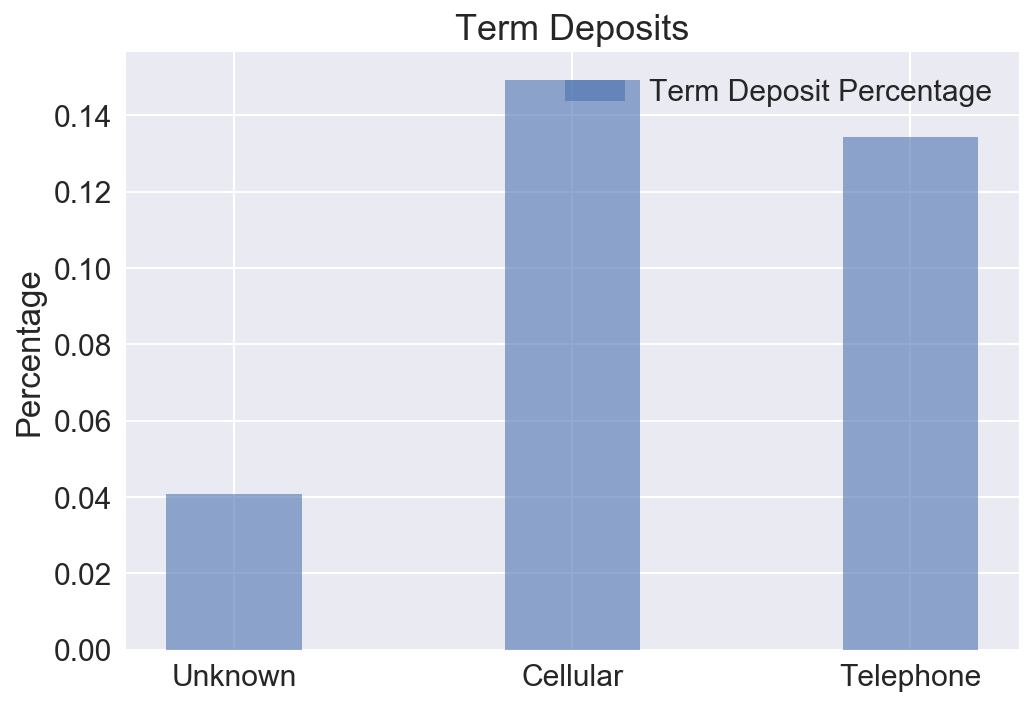

In [73]:
objects = ('Unknown', 'Cellular', 'Telephone')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, percents_yes, alpha=0.6, label='Term Deposit Percentage', align='center', width=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Term Deposits')
plt.legend()

### Since unknown is clearly not uniformly distributed with the other contact methods that percentage of subscriptions for term deposits it would seem to have an impact on the predictions. However, unknown, is what as says unknown and we are not sure if it is cellular, telephone, or anything else. So the logistic model is incorrectly predicting this feature to have importance allthought it really shouldnt. If I were to get rid of the unknown values from my dataset it is very likely it would not show up with feature importance in my logistic regression, possibly improving my score. 

Accuracy:  0.861953280318
Precision:  0.739567634398
Roc-Auc:  0.846320610892


Confusion matrix, without normalization
                    No Term Deposit    Term Deposit
    No Term Deposit          6692.0           161.0
       Term Deposit           950.0           245.0


Normalized confusion matrix
                    No Term Deposit    Term Deposit
    No Term Deposit             1.0             0.0
       Term Deposit             0.8             0.2


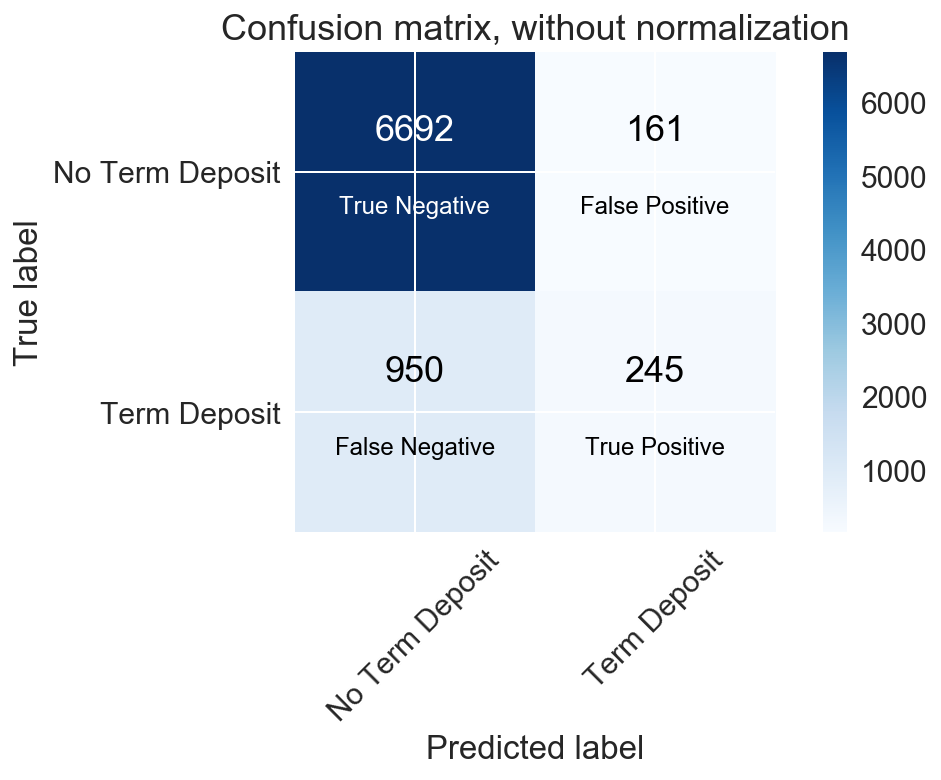

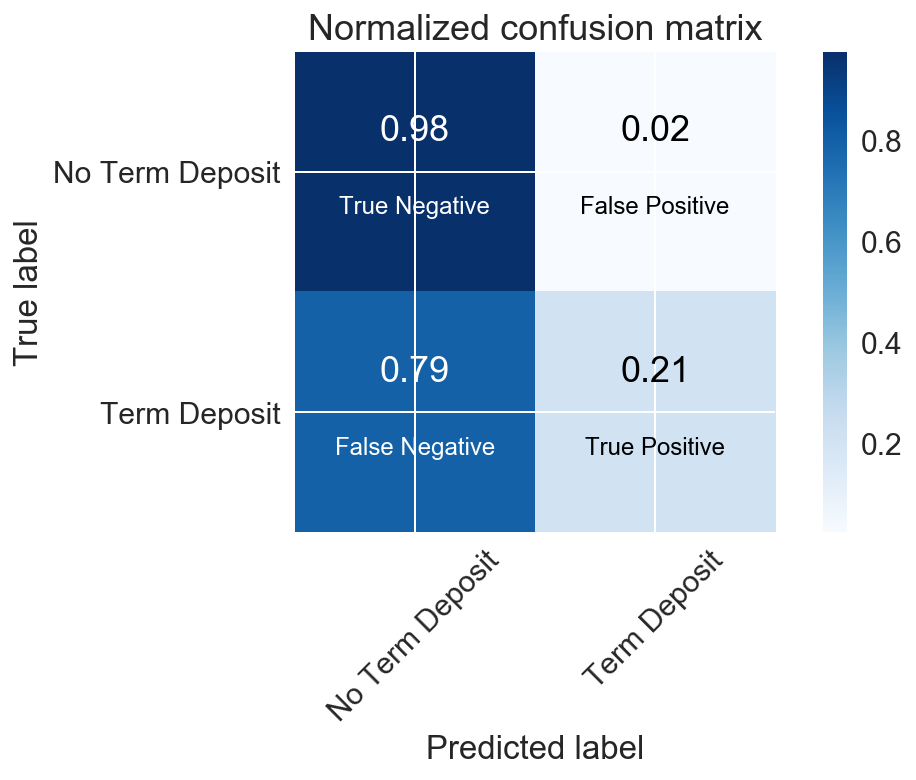

In [102]:
y_pred = X_test_predictions

#Set font and graph size
sns.set(font_scale=1.5)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Print accuracy and precision
print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
print 'Precision: ', precision_score(y_test, y_pred, average='macro')
print 'Roc-Auc: ', roc_auc_score(y_test, X_test_predprob)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [103]:
baseline = len(df[df.binary_td == 0]['y'])/float(len(y))
print baseline

0.883015195417


### The logistic model, using lasso regularization, which I obtained through a grid search did not produce the best results. With a roc-auc score of .58 it is not much better than just guessing. Considering 88% of individuals do not apply for a term deposit I would be almost better off just guessing that everyone didnt subscribe for a term deposit. Looking at the confusion matrix the logistic regression predicted almost everyone did not subscribe for a term deposit. This is not the best model for this data set. 

In [104]:
# Create svm models
from sklearn.metrics import classification_report
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

def svm_cm(X, y, kernel): 
    '''A function for modeling data using svm'''
    classifier = svm.SVC(kernel=kernel)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    print kernel + ' SVM Classifier: ', cross_val_score(classifier, X_train, y_train, scoring='accuracy').mean()
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    print cnf_matrix
    #Not normalized dconfusion matrix
    #Y axis actual, x axis predicted
    print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
    print 'Precision: ', precision_score(y_test, y_pred, average='macro')
    print 
    print (classification_report(y_test, y_pred))
    return classifier

In [ ]:
svm_rbf = svm_cm(X, y, 'rbf')

### This model is awful and I am not going to use it. This model did exactly what I did not want to happen, predict  everyone will not subscribe to a term deposit. I used a radial bais function kernel to classifiy my data within the support vector machine, which assumes my data is not linearily related but more related in a circular pattern. Given this failure, we have learned that our data is likely not circularily related. Next I am going to check if it is linearily related 

In [ ]:
# svm_lin = svm_cm(X, y, 'linear')

## When trying to run this cell it ran for way too long and I was unable to get an output. 

In [ ]:
# svm_ply = svm_cm(X, y, 'poly')

## This one also ran for a long time and hung up my computer

## Technical Audience

The data is unbalanced, I could balance my data but if I did so I would lose a lot of data points. Majority of the data is classification data and not continuous, I could have either dummified my data or factorized my data. I decided to factorize my data, but it should not make much of a difference as they are doing, in essence, the same thing. After I factorized my data I wanted to see run a correlation matrix to see each variables relations to one another. In this case it was not particularily useful, the best fact the correlation matrix uncovered was the positive correlation of the duration to term deposit. By dividing the data by rows associated with No term deposit, and yes term deposit I could make comparisions to see any possible affect on my predictions. After some analysis duration and bank balance variables seemed most likely to have a greater predictive power. Both these variables were continuous. Building some models on my wrangled data I was able to make some predictions on term deposits. 
   
I built a XGBoost, Logistical, and Support Vector model to make predictions. Unsurprisingly the most powerful and newest model XGBoost worked the best. The most important features, for the most part, alligned with some of my predictions and with further analysis of ther feautre importance, namely day of the month, it made sense to be of feature importance. Since XGBoost has a lot of modeling power and overfitting prevention methods, such as boosting, I wanted to compare it's accuracy and feature importances with a simpiler model, Logistic regression. The logistic regression did not perform as well and incorporated feature importances that made sense for the model to use, but not statistically relevant for a predictions. This is not necessarily the models mistake, by better analyzing the data before hand I should have dropped all unknown contact values because they are too ambiguous to make predictions. Once I excluded the statistically irrelevant rows in the feature, the logit model no longer used contact as a feature but the score was worse. It's very possible that a logistic regression might not be the best model to classify this dataset.
    
The support vector machine (SVM) classifier only could process the radial bias function (rbf) kernel, assuming cicular classification, and produced the worst results. The SVM predicted that no one would subscribe to the term deposit, which is a problem I feared. With very unbalanced data it is easy to get a decent score just by predicting everything will fall into one category, which is exactly what happened with the SVM prediction. Due to this poor prediction it is clear that our data does not follow a circular classification trend. I was not able to get the other SVM models to run all the way through, but if I had I would have liked to check the linear and poly kernels to determine if the data followed a different trend and the SVM was able to get better results. 
    
Further steps would require more EDA to weed out weaker variables, like the unknowns in the logistic model. Certain variables also might have interactions with one another so adding a possible interaction term may also produce better results. In addition, I would like to balance the data by ran
domly removing no term deposit rows so there was an equal amount of yes and no term deposits. While I would have to remove data it could help increase the accuracy of my predictions, but this is not certain. 

## Non-Technical Audience

A bank would like to wanted to determine the efficacy of their campaign to get customers to subscribe for their term deposits. Majority of individuals, 88%, did not subscribe for a term deposits so it would be easy to predict up to 88% accuracy by stating no one subscribed for a term deposit. However, the bank would not find this very useful as the campaigns intent was to get people to subscribe to their term deposits. I need my model to predict to an accuracy higher than 88% otherwise it is not particularily useful. 

A lot of the data provided were classified in non-numerical groups, which cannot fit in a model. I needed to convert these classes such as marital, single, and divorce to 0, 1, 2 so I can use them to build a model. After making the variables useable I needed to learn more about my data in order to determine which varaibles will be useful in my model. There are several different way to do this but some of the most descriptive methods are plotting their distributions. Since I wanted to determine the differences between individuals who did subscribe to term deposits and those who did not I wanted to separate my data and plot their distributions over eachother to see how they differed. Certain varibles such as duration and day of the month, according to my original analysis, should have a greater impact in my model. 

I used several different models to make predictions on individuals based on the other information provided from the campaign whether or not they would subscribe for a term deposit. First I used the newest and industry proven model called XGBoost, which uses a form of decision trees to make predictions. This model did the best, even with less exploratory data analysis than the other models I tried. The next model I tried is one of the more simplisitic models, the logistic model. It did poorly but not the worst. The support vector model for radial bias, in other words a circular classification model. I would have liked to perform on other support vector models such as linear and polynomial to see if the classification follows a different pattern. In additional I would like to build a model by balancing the data by randomly deleting rows so half of the was classified as yes term deposit and the other half no term deposit. This may make it easier for the model to predict whether or not they subscribed for a term deposit, but we have to remove data to do so it's possible this may not help. Futher analysis and models would be required to make a more accurate prediction. 



# Part 2

### Student Sample Submission 1

Actual code before comments

In [75]:
import pandas as pd
import numpy as np
from sklearn'.linear_model' import LinearRegression
## easy mistake, I generally save my imports to gist-box for later usage. Makes my life easier.
from sklearn.cross_validation import cross_val_score

# Load data
d'ata' = pd.read_csv('../data/train.csv')
## When you load in your dataframe you are going to want to keep the same labeling throughout your code
## I generally try and use something easy to remeber and representative of the data e.g.(df, data, train)


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)
## I am not sure exactly what you are trying to predict, but looking at your cross validation it looks like SalaryNormlized
## If you are trying to predict or (model for) SalaryNormalized the conventional variable name is 'y'
## plus it helps you keep track of you x and y variable.

## The get dummies looks all good!

# Setup model
model = LinearRegression()
## This looks good!

# Evaluate model
from sklearn.cross_validation import cross_val_score
## You import this twice, so you can delete things to speed things up, although it wont affect your outcome

from sklearn.cross_validation import train_test_split


scores = cross_val_score(model, x2, 'y', cv=1, scoring='mean_absolute_error')
## I would suggest a cross validation greater than 1, because a cross validation of 1 is essentiall the same as not
## doing cross validation. I beleive the default is 3, but I would have to double check. 


print(scores.mean())

ImportError: cannot import name LinearRegression

Looks good so far. Nice work with the get_dummies, thats a tricker method. I would try and stick to some of the conventions for labeling, it will come in handy later when you get more variables and it is harder to keep track of. I wouldnt worry too much about that now, as you become more familiar with coding it will become more of second nature and you wont even think about it. I would stick to focusing on the concepts. REMEMBER what you are trying to predict and the concepts of what the code is actually doing. The syntax will come. Concepts are more important. 

Also when you get stuck make sure you reference sklearn when you are using their packages. They have pretty good information in their documentation.

### Student Sample Submission 2

Actual Code

Commented Code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

This looks good! I cannot visibly see anything wrong without loading in the data set. I am not sure 'mean_absolute_error' is the right syntax for mean absolute error, but I would have to consult sklearn's documentation to make sure. Other than that it looks great. Nice work, feel free to slack me if you run into any problems. 